In [13]:
# 🌦️ Analyse Exploratoire des Données Météo (EDA)
# Ce notebook explore les données météorologiques collectées pour quatre grandes villes :
# Antananarivo, Paris, Tokyo et London.
# Données issues de l’API OpenWeather + historiques fusionnées.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# 📥 Chargement des données
df = pd.read_csv("/home/ny-antsaniaina/airflow/dags/examen/data/merge_weather.csv")
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.date
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.head()


,ville,date,temp,is_rainy,day,month,year
0,Antananarivo,2025-06-29 21:00:00,12.98,0,2025-06-29,6,2025
1,Antananarivo,2025-06-30 00:00:00,11.49,0,2025-06-30,6,2025
2,Antananarivo,2025-06-30 03:00:00,8.89,0,2025-06-30,6,2025
3,Antananarivo,2025-06-30 06:00:00,15.21,0,2025-06-30,6,2025
4,Antananarivo,2025-06-30 09:00:00,22.03,0,2025-06-30,6,2025


In [14]:
# 📊 Statistiques agrégées par ville
summary = df.groupby('ville').agg(
    temp_moyenne=('temp', 'mean'),
    temp_min=('temp', 'min'),
    temp_max=('temp', 'max'),
    ecart_type=('temp', 'std'),
    jours_pluvieux=('is_rainy', 'sum')
).reset_index()

summary['score_extreme'] = (
    (summary['temp_max'] - summary['temp_min']) +
    summary['ecart_type'] * 2 +
    summary['jours_pluvieux']
).round(2)

summary


,ville,temp_moyenne,temp_min,temp_max,ecart_type,jours_pluvieux,score_extreme
0,Antananarivo,13.43225,7.74,22.03,3.565638,2,23.42
1,London,22.37825,13.91,34.11,5.304708,6,36.81
2,Paris,26.89425,16.16,39.76,6.275051,1,37.15
3,Tokyo,27.39300,24.27,32.48,2.187799,7,19.59


/tmp/ipykernel_14771/1855382538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='ville', y='temp_moyenne', palette='coolwarm')


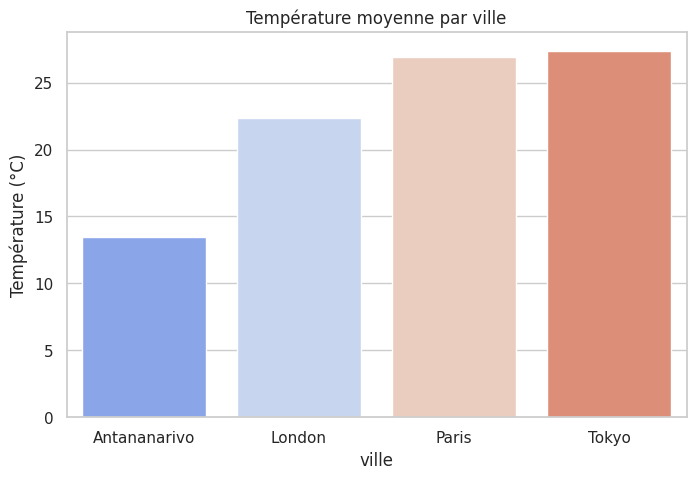

In [16]:
# 📈 Température moyenne par ville
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='ville', y='temp_moyenne', palette='coolwarm')
plt.title('Température moyenne par ville')
plt.ylabel('Température (°C)')
plt.show()


/tmp/ipykernel_14771/513285730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='ville', y='jours_pluvieux', palette='Blues')


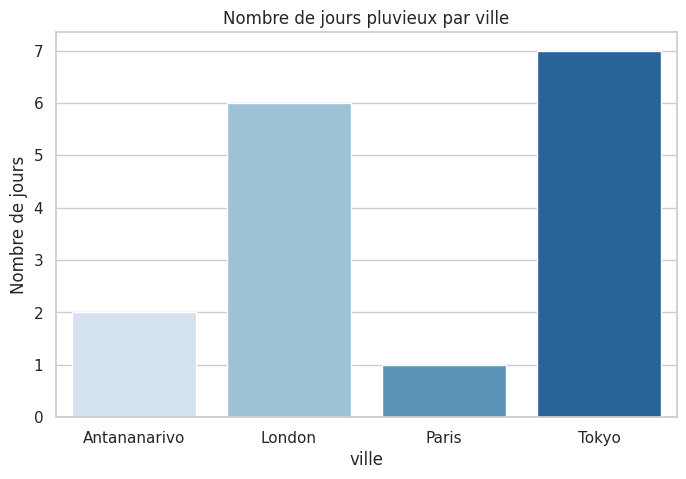

In [15]:
# ☔ Nombre de jours pluvieux par ville
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='ville', y='jours_pluvieux', palette='Blues')
plt.title('Nombre de jours pluvieux par ville')
plt.ylabel('Nombre de jours')
plt.show()
